Inspect the HDF5 file

In [ ]:
import pandas as pd

# Path to your HDF5 file
hdf5_file = r'C:\Users\kaspe\Documents\GitHub\AAU-IoT-Solution-AI-REDGIO\data_ozren\Dataset.h5'

# Open and inspect the HDF5 file
def inspect_hdf5_file(file_path):
    with pd.HDFStore(file_path, 'r') as store:
        print("Datasets in HDF5 file:")
        for key in store.keys():
            print(f"\nDataset: {key}")
            # Load the dataset into a DataFrame
            df = store[key]
            # Print dataset details
            print(f"  Number of rows: {df.shape[0]}")
            print(f"  Number of columns: {df.shape[1]}")
            print(f"  Columns: {list(df.columns)}")
            print("  First 5 rows:")
            print(df.head())  # Display first 5 rows
            print("  Last 5 rows:")
            print(df.tail())  # Display last 5 rows

# Call the function
inspect_hdf5_file(hdf5_file)


Datasets in HDF5 file:

Dataset: /dataset
  Number of rows: 33375227
  Number of columns: 4
  Columns: ['Source', 'Time (ms)', 'Type', 'Value']
  First 5 rows:
          Source  Time (ms)          Type  Value
0  i030520235006        0.0  Nset (1/min)    0.0
1  i030520235068        0.0  Nset (1/min)    0.0
2  i050520238018        0.0   Angle (deg)    0.0
3  i030520237070        0.0   Angle (deg)    0.0
4  i280420232085        0.0   Angle (deg)    0.0
  Last 5 rows:
                  Source  Time (ms)          Type  Value
33375222  t1005202314051   5001.519    TCP_y (mm)  2.600
33375223  t1005202314051   5001.519    TCP_x (mm)  0.000
33375224  t1005202314051   5001.519  TCP_rz (rad) -1.204
33375225  t1005202314051   5001.519    TCP_z (mm) -4.600
33375226  t1005202314051   5001.519  TCP_rx (rad)  1.234


: 

Visualizing the dataset

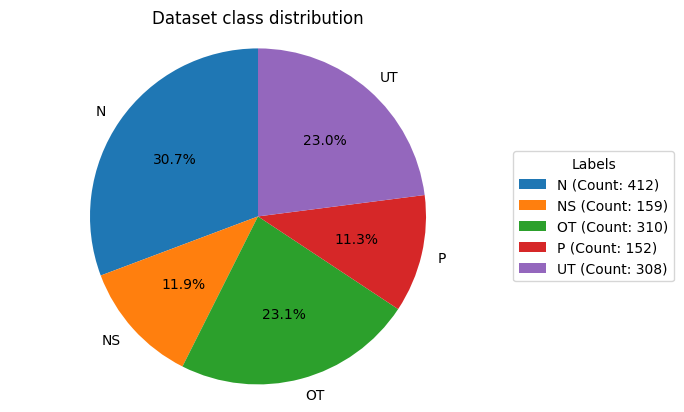

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Replace 'your_file.csv' with the path to your CSV file
csv_file = r"C:\Users\kaspe\Documents\GitHub\AAU-IoT-Solution-AI-REDGIO\data_ozren\Labels_names.csv"

# Read the CSV file
df = pd.read_csv(csv_file)

# Assuming the column with the names is called 'name_column'
name_column = 'File Name'

label_column = 'Label'

# Extract the required information using a regex pattern
pattern = re.compile(r't\d{8}(\d{1,2})\d{3}')

def extract_number(name):
    match = pattern.match(name)
    if match:
        return int(match.group(1))
    return None

# Add a new column with the extracted numbers
df['number'] = df[name_column].apply(extract_number)



# Filter the DataFrame for filenames starting with 't'
filtered_df = df[df[name_column].str.startswith('t')]

# Function to plot the pie chart for all test numbers combined
def plot_combined_pie_chart(counts):
    fig, ax = plt.subplots()
    wedges, _, _ = ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    
    # Create legend with label and count information
    legend_labels = [f'{label} (Count: {count})' for label, count in zip(counts.index, counts)]
    ax.legend(wedges, legend_labels, title='Labels', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
    
    ax.set_title('Dataset class distribution')
    plt.show()

# Count the occurrences of each label for all test numbers combined in the filtered DataFrame
combined_label_counts = filtered_df[label_column].value_counts().sort_index()

# Plot the pie chart for all test numbers combined
plot_combined_pie_chart(combined_label_counts)


Assigninging colour scheme for the clases and the folders used for intrinsic values:

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Assigning dull colors to each class
class_colors = {
    "N": "#4682B4",  # Dull blue
    "NS": "#D2691E",  # Dull orange
    "OT": "#6B8E23",  # Dull green
    "P": "#FFD700",  # Dull yellow
    "UT": "#8B0000",  # Dull red
}

# List of folders
folders = [
    r"C:\Users\kaspe\Documents\GitHub\AAU-IoT-Solution-AI-REDGIO\data_ozren\Intrinsic data\N",
    r"C:\Users\kaspe\Documents\GitHub\AAU-IoT-Solution-AI-REDGIO\data_ozren\Intrinsic data\NS",
    r"C:\Users\kaspe\Documents\GitHub\AAU-IoT-Solution-AI-REDGIO\data_ozren\Intrinsic data\OT",
    r"C:\Users\kaspe\Documents\GitHub\AAU-IoT-Solution-AI-REDGIO\data_ozren\Intrinsic data\P",
    r"C:\Users\kaspe\Documents\GitHub\AAU-IoT-Solution-AI-REDGIO\data_ozren\Intrinsic data\UT",
]

Time:

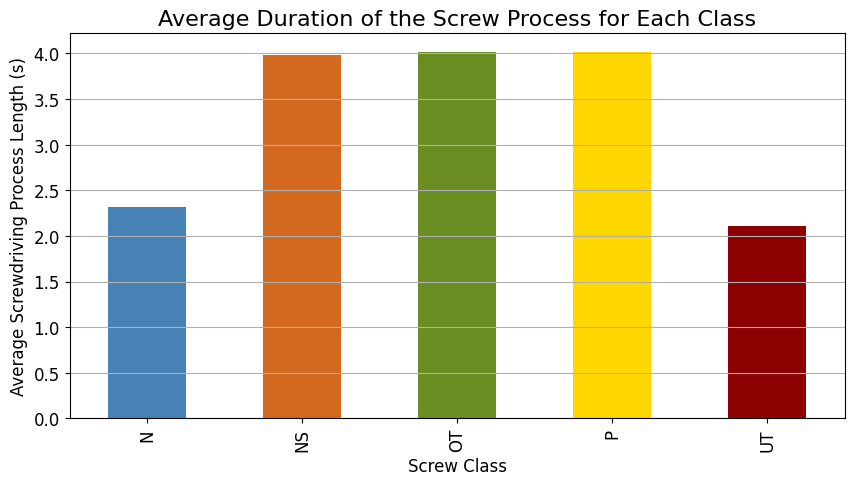

In [21]:



# Create a dictionary to store the length of the process for each folder
folder_lengths = {}



# Loop through each folder
for folder in folders:
    total_length = 0
    file_count = 0
    for file in os.listdir(folder):
        if file.endswith(".csv"):
            df = pd.read_csv(f'{folder}/{file}')
            # Assuming the "Time (ms)" column is in time order
            total_length += df['Time (ms)'].max() - df['Time (ms)'].min()
            file_count += 1
    # Convert from milliseconds to seconds and calculate average
    average_length = total_length / 1000 / file_count
    folder_name = os.path.basename(folder)
    folder_lengths[folder_name] = average_length

# Convert the dictionary to a pandas Series for easier plotting
lengths_series = pd.Series(folder_lengths)

# Get the corresponding colors for the bars
bar_colors = [class_colors[class_name] for class_name in lengths_series.index]

# Create the bar chart
plt.figure(figsize=(10, 5))
lengths_series.plot(kind='bar', color=bar_colors)
plt.xlabel('Screw Class', fontsize=12)
plt.ylabel('Average Screwdriving Process Length (s)', fontsize=12)
plt.title('Average Duration of the Screw Process for Each Class', fontsize=16)

# Increase x-tick and y-tick label sizes
plt.tick_params(axis='both', which='major', labelsize=12)
# Add a grid
plt.grid(axis='y')

plt.show()


Torque:

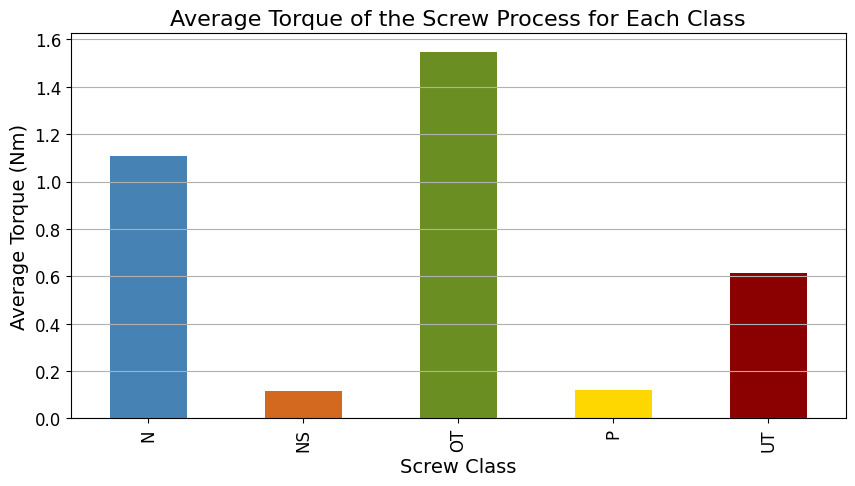

In [22]:
# Create a dictionary to store the average torque for each folder
folder_torques = {}

# Loop through each folder
for folder in folders:
    total_torque = 0
    file_count = 0
    for file in os.listdir(folder):
        if file.endswith(".csv"):
            df = pd.read_csv(f'{folder}/{file}')
            # Sum up the maximum torque and count the files
            total_torque += df['Torque (Nm)'].max()
            file_count += 1
    # Calculate average torque
    average_torque = total_torque / file_count
    folder_name = os.path.basename(folder)
    folder_torques[folder_name] = average_torque

# Convert the dictionary to a pandas Series for easier plotting
torques_series = pd.Series(folder_torques)

# Get the corresponding colors for the bars
bar_colors = [class_colors[class_name] for class_name in torques_series.index]

# Create the bar chart
plt.figure(figsize=(10, 5))
torques_series.plot(kind='bar', color=bar_colors)
plt.xlabel('Screw Class', fontsize=14)  # Increased font size
plt.ylabel('Average Torque (Nm)', fontsize=14)  # Increased font size
plt.title('Average Torque of the Screw Process for Each Class', fontsize=16)  # Increased font size

# Increase x-tick and y-tick label sizes
plt.tick_params(axis='both', which='major', labelsize=12)
# Add a grid
plt.grid(axis='y')

plt.show()


Rotations (Nset (1/min)):

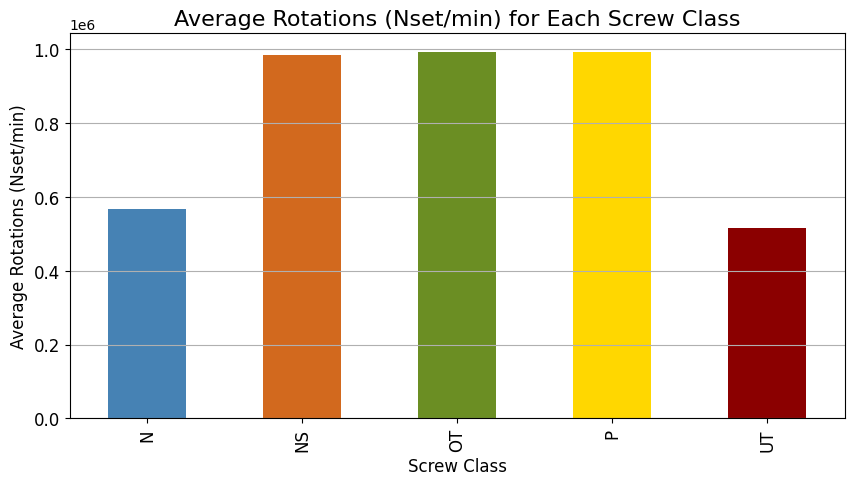

In [ ]:
# Create a dictionary to store the average rotations for each folder
folder_rotations = {}


# Loop through each folder
for folder in folders:
    total_rotations = 0
    file_count = 0
    for file in os.listdir(folder):
        if file.endswith(".csv"):
            df = pd.read_csv(f"{folder}/{file}")
            # Assuming "Nset (1/min)" contains the rotations data
            total_rotations += df["Nset (1/min)"].sum()
            file_count += 1
    # Calculate the average rotations
    average_rotations = total_rotations / file_count
    folder_name = os.path.basename(folder)
    folder_rotations[folder_name] = average_rotations

# Convert the dictionary to a pandas Series for easier plotting
rotations_series = pd.Series(folder_rotations)

# Get the corresponding colors for the bars
bar_colors = [class_colors[class_name] for class_name in rotations_series.index]

# Create the bar chart
plt.figure(figsize=(10, 5))
rotations_series.plot(kind='bar', color=bar_colors)
plt.xlabel('Screw Class', fontsize=12)
plt.ylabel('Average Rotations (Nset/min)', fontsize=12)
plt.title('Average Rotations (Nset/min) for Each Screw Class', fontsize=16)

# Increase x-tick and y-tick label sizes
plt.tick_params(axis='both', which='major', labelsize=12)
# Add a grid
plt.grid(axis='y')
plt.show()


Dominant frequency:

In [24]:
# List of Extrinsinc folders

folders = [
    r"C:\Users\kaspe\Documents\GitHub\AAU-IoT-Solution-AI-REDGIO\data_ozren\Extrinsic data\N",
    r"C:\Users\kaspe\Documents\GitHub\AAU-IoT-Solution-AI-REDGIO\data_ozren\Extrinsic data\NS",
    r"C:\Users\kaspe\Documents\GitHub\AAU-IoT-Solution-AI-REDGIO\data_ozren\Extrinsic data\OT",
    r"C:\Users\kaspe\Documents\GitHub\AAU-IoT-Solution-AI-REDGIO\data_ozren\Extrinsic data\P",
    r"C:\Users\kaspe\Documents\GitHub\AAU-IoT-Solution-AI-REDGIO\data_ozren\Extrinsic data\UT",
]

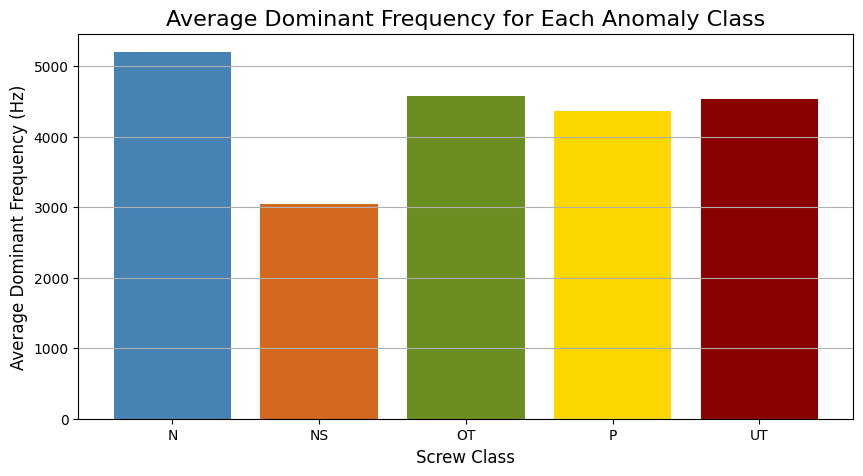

In [25]:
from scipy.io import wavfile
from scipy.fftpack import fft

# Dictionary to store average frequencies for each class
class_frequencies = {}

# Process each folder (class)
for folder in folders:
    dominant_frequencies = []
    for file in os.listdir(folder):
        if file.endswith(".wav"):
            # Load the .wav file
            sample_rate, data = wavfile.read(os.path.join(folder, file))
            
            # Handle stereo audio by taking one channel
            if len(data.shape) > 1:
                data = data[:, 0]
            
            # Perform FFT to get frequencies
            n = len(data)
            fft_result = fft(data)
            freqs = np.fft.fftfreq(n, d=1/sample_rate)
            magnitude = np.abs(fft_result)
            
            # Find the dominant frequency (exclude negative frequencies)
            positive_freqs = freqs[freqs > 0]
            positive_magnitude = magnitude[freqs > 0]
            dominant_frequency = positive_freqs[np.argmax(positive_magnitude)]
            dominant_frequencies.append(dominant_frequency)
    
    # Calculate average dominant frequency for the class
    average_frequency = np.mean(dominant_frequencies)
    class_name = os.path.basename(folder)
    class_frequencies[class_name] = average_frequency

# Get the corresponding colors for the bars
bar_colors = [class_colors[class_name] for class_name in class_frequencies.keys()]

# Plot the results
plt.figure(figsize=(10, 5))
plt.bar(class_frequencies.keys(), class_frequencies.values(), color=bar_colors)
plt.xlabel('Screw Class', fontsize=12)
plt.ylabel('Average Dominant Frequency (Hz)', fontsize=12)
plt.title('Average Dominant Frequency for Each Anomaly Class', fontsize=16)
plt.grid(axis='y')
plt.show()


Average current for Robot: 

In [ ]:
# List of Task folders

folders = [
    r"C:\Users\kaspe\Documents\GitHub\AAU-IoT-Solution-AI-REDGIO\data_ozren\Task data\N",
    r"C:\Users\kaspe\Documents\GitHub\AAU-IoT-Solution-AI-REDGIO\data_ozren\Task data\NS",
    r"C:\Users\kaspe\Documents\GitHub\AAU-IoT-Solution-AI-REDGIO\data_ozren\Task data\OT",
    r"C:\Users\kaspe\Documents\GitHub\AAU-IoT-Solution-AI-REDGIO\data_ozren\Task data\P",
    r"C:\Users\kaspe\Documents\GitHub\AAU-IoT-Solution-AI-REDGIO\data_ozren\Task data\UT",
]

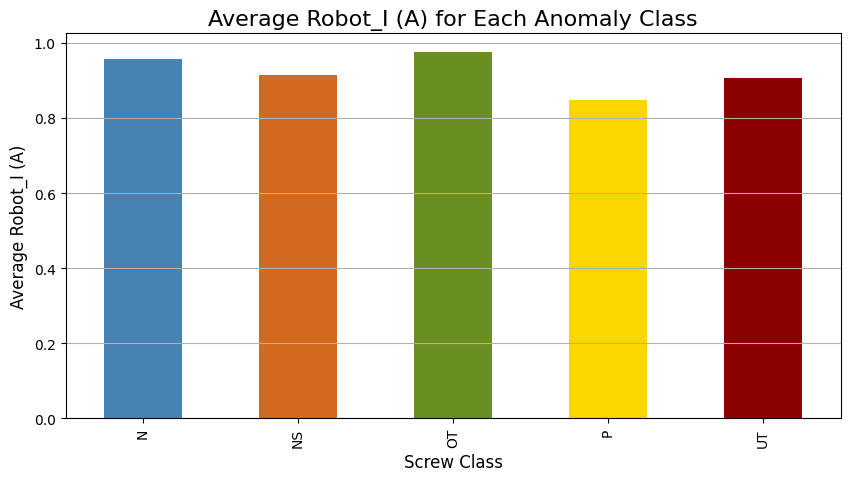

In [ ]:
# Dictionary to store the average "Robot_I (A)" for each class
class_averages = {}



# Process each folder (class)
for folder in folders:
    robot_i_values = []
    for file in os.listdir(folder):
        if file.endswith(".csv"):
            # Read the CSV file
            df = pd.read_csv(os.path.join(folder, file))
            # Extract values from the "Robot_I (A)" column
            if "Robot_I (A)" in df.columns:
                robot_i_values.extend(df["Robot_I (A)"].values)
    
    # Calculate the average for the class
    if robot_i_values:
        average_robot_i = sum(robot_i_values) / len(robot_i_values)
    else:
        average_robot_i = 0  # Handle cases where no data exists
    
    class_name = os.path.basename(folder)  # Use folder name as class name
    class_averages[class_name] = average_robot_i

# Convert the dictionary to a pandas Series for easier plotting
robot_i_series = pd.Series(class_averages)

# Get the corresponding colors for the bars
bar_colors = [class_colors[class_name] for class_name in robot_i_series.index]

# Plot the results
plt.figure(figsize=(10, 5))
robot_i_series.plot(kind='bar', color=bar_colors)
plt.xlabel('Screw Class', fontsize=12)
plt.ylabel('Average Robot_I (A)', fontsize=12)
plt.title('Average Robot_I (A) for Each Anomaly Class', fontsize=16)
plt.grid(axis='y')
plt.show()


Graphs:

In [26]:
# List of files used for the graphs
files = [
    r"C:\Users\kaspe\Documents\GitHub\AAU-IoT-Solution-AI-REDGIO\data_ozren\Intrinsic data\N\i030520236037.csv",
    r"C:\Users\kaspe\Documents\GitHub\AAU-IoT-Solution-AI-REDGIO\data_ozren\Intrinsic data\NS\i270420231021.csv",
    r"C:\Users\kaspe\Documents\GitHub\AAU-IoT-Solution-AI-REDGIO\data_ozren\Intrinsic data\OT\i050520238021.csv",
    r"C:\Users\kaspe\Documents\GitHub\AAU-IoT-Solution-AI-REDGIO\data_ozren\Intrinsic data\P\i030520236001.csv",
    r"C:\Users\kaspe\Documents\GitHub\AAU-IoT-Solution-AI-REDGIO\data_ozren\Intrinsic data\UT\i030520234037.csv"
]


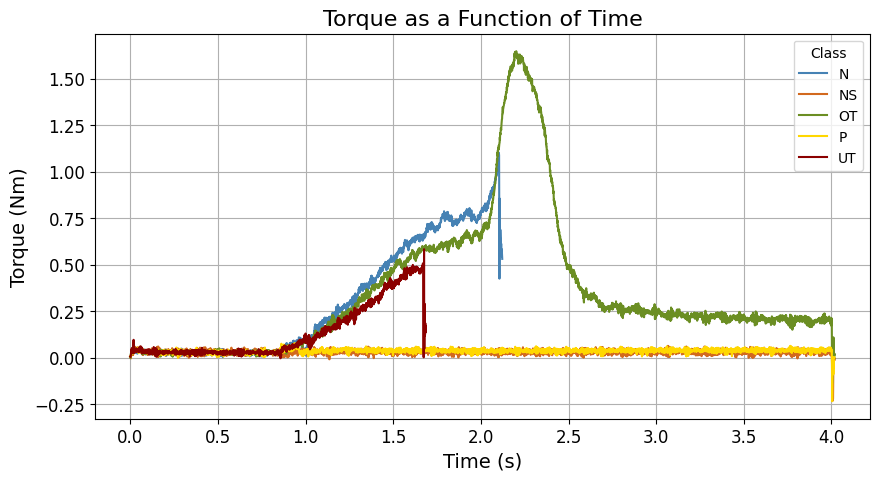

In [ ]:
# Torque graph by class


plt.figure(figsize=(10, 5))

for file in files:
    df = pd.read_csv(file)
    # Get folder name to determine the class
    foldername = os.path.basename(os.path.dirname(file))  # Extract folder name as class
    color = class_colors.get(foldername, 'k')  # Default to black if folder name not found
    # Plot the torque as a function of time
    plt.plot(df['Time (ms)'] / 1000, df['Torque (Nm)'], color=color, label=foldername)

plt.xlabel('Time (s)', fontsize=14)  # Increased font size
plt.ylabel('Torque (Nm)', fontsize=14)  # Increased font size
plt.title('Torque as a Function of Time', fontsize=16)  # Increased font size

# Increase x-tick and y-tick label sizes
plt.tick_params(axis='both', which='major', labelsize=12)

# Add a grid
plt.grid(True)

# Add a legend
plt.legend(title="Class")
plt.show()


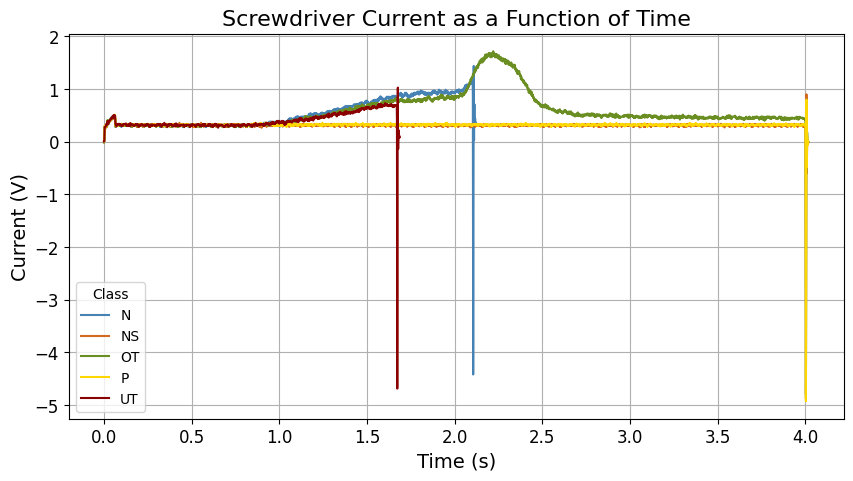

In [30]:
# Screwdriver Current graph by class

plt.figure(figsize=(10, 5))

for file in files:
    df = pd.read_csv(file)
    # Get folder name to determine the class
    foldername = os.path.basename(os.path.dirname(file))  # Extract folder name as class
    color = class_colors.get(foldername, 'k')  # Default to black if folder name not found
    # Plot the current as a function of time
    plt.plot(df['Time (ms)'] / 1000, df['Current (V)'], color=color, label=foldername)

plt.xlabel('Time (s)', fontsize=14)  # Increased font size
plt.ylabel('Current (V)', fontsize=14)  # Increased font size
plt.title('Screwdriver Current as a Function of Time', fontsize=16)  # Increased font size

# Increase x-tick and y-tick label sizes
plt.tick_params(axis='both', which='major', labelsize=12)

# Add a grid
plt.grid(True)

# Add a legend
plt.legend(title="Class")
plt.show()


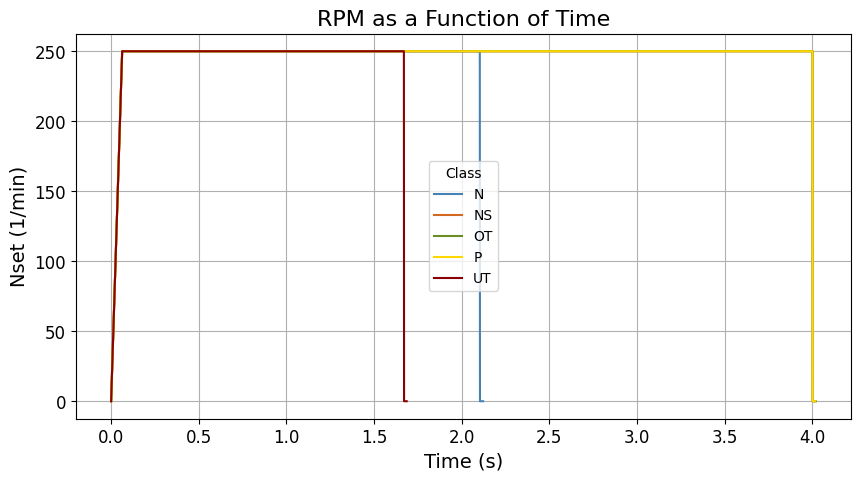

In [ ]:
# RPM graph by class




plt.figure(figsize=(10, 5))

for file in files:
    df = pd.read_csv(file)
    # Get folder name to determine the class
    foldername = os.path.basename(os.path.dirname(file))  # Extract folder name as class
    color = class_colors.get(foldername, 'k')  # Default to black if folder name not found
    # Plot the RPM (Nset) as a function of time
    plt.plot(df['Time (ms)'] / 1000, df['Nset (1/min)'], color=color, label=foldername)

plt.xlabel('Time (s)', fontsize=14)  # Increased font size
plt.ylabel('Nset (1/min)', fontsize=14)  # Increased font size
plt.title('RPM as a Function of Time', fontsize=16)  # Increased font size

# Increase x-tick and y-tick label sizes
plt.tick_params(axis='both', which='major', labelsize=12)

# Add a grid
plt.grid(True)

# Add a legend
plt.legend(title="Class")
plt.show()


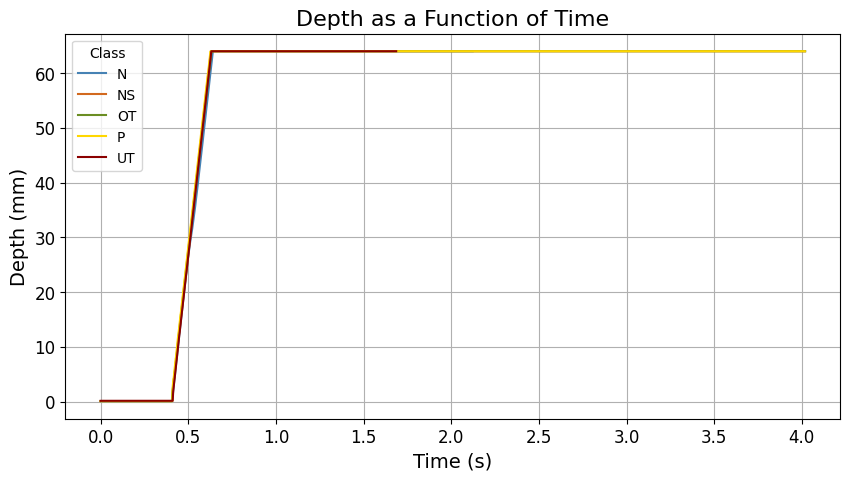

In [28]:
# Depth graph by class

import pandas as pd
import matplotlib.pyplot as plt
import os


# Assigning dull colors to each class
class_colors = {
    "N": "#4682B4",  # Dull blue
    "NS": "#D2691E",  # Dull orange
    "OT": "#6B8E23",  # Dull green
    "P": "#FFD700",  # Dull yellow
    "UT": "#8B0000",  # Dull red
}

plt.figure(figsize=(10, 5))

for file in files:
    df = pd.read_csv(file)
    # Get folder name to determine the class
    foldername = os.path.basename(os.path.dirname(file))  # Extract folder name as class
    color = class_colors.get(foldername, 'k')  # Default to black if folder name not found
    # Plot the depth as a function of time
    plt.plot(df['Time (ms)'] / 1000, df['Depth (mm)'], color=color, label=foldername)

plt.xlabel('Time (s)', fontsize=14)  # Increased font size
plt.ylabel('Depth (mm)', fontsize=14)  # Increased font size
plt.title('Depth as a Function of Time', fontsize=16)  # Increased font size

# Increase x-tick and y-tick label sizes
plt.tick_params(axis='both', which='major', labelsize=12)

# Add a grid
plt.grid(True)

# Add a legend
plt.legend(title="Class")
plt.show()


Angle

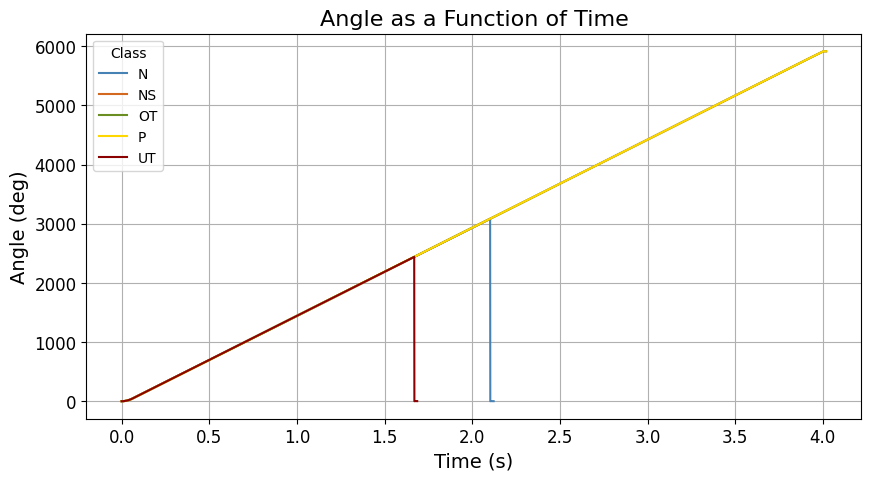

In [29]:
plt.figure(figsize=(10, 5))

for file in files:
    df = pd.read_csv(file)
    # Get folder name to determine the class
    foldername = os.path.basename(os.path.dirname(file))  # Extract folder name as class
    color = class_colors.get(foldername, 'k')  # Default to black if folder name not found
    # Plot the angle as a function of time
    plt.plot(df['Time (ms)'] / 1000, df['Angle (deg)'], color=color, label=foldername)

plt.xlabel('Time (s)', fontsize=14)  # Increased font size
plt.ylabel('Angle (deg)', fontsize=14)  # Increased font size
plt.title('Angle as a Function of Time', fontsize=16)  # Increased font size

# Increase x-tick and y-tick label sizes
plt.tick_params(axis='both', which='major', labelsize=12)

# Add a grid
plt.grid(True)

# Add a legend
plt.legend(title="Class")
plt.show()